In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
# Load the dataset
file_path = 'train.csv'  # Adjust the path accordingly
df = pd.read_csv(file_path)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [19]:
df.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [20]:
df['age'] = df['age'].fillna(df['age'].mean())

In [21]:
df.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                            0
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [22]:
print("First five rows of all columns:")
print(df.head())

First five rows of all columns:
   site_id  patient_id    image_id laterality view   age  cancer  biopsy  \
0        2       10006   462822612          L   CC  61.0       0       0   
1        2       10006  1459541791          L  MLO  61.0       0       0   
2        2       10006  1864590858          R  MLO  61.0       0       0   
3        2       10006  1874946579          R   CC  61.0       0       0   
4        2       10011   220375232          L   CC  55.0       0       0   

   invasive  BIRADS  implant density  machine_id  difficult_negative_case  
0         0     NaN        0     NaN          29                    False  
1         0     NaN        0     NaN          29                    False  
2         0     NaN        0     NaN          29                    False  
3         0     NaN        0     NaN          29                    False  
4         0     0.0        0     NaN          21                     True  


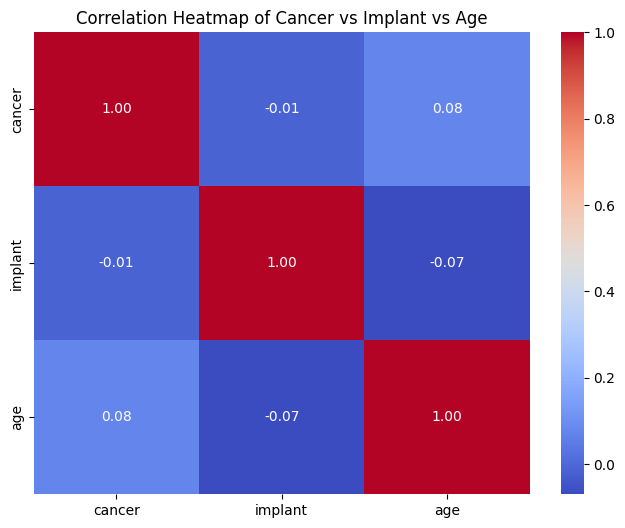

In [23]:

correlation_matrix = df[['cancer', 'implant','age']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Cancer vs Implant vs Age')

plt.show()


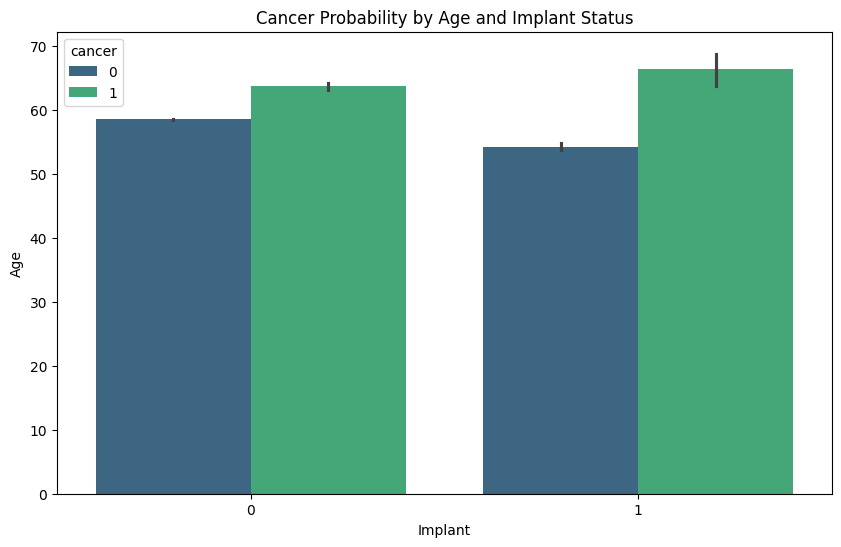

In [24]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns: 'Age', 'Implant', 'Cancer_Probability'
plt.figure(figsize=(10, 6))
sns.barplot(x='implant', y='age', hue='cancer', data=df, palette='viridis')
plt.title('Cancer Probability by Age and Implant Status')
plt.xlabel('Implant')
plt.ylabel('Age')
plt.show()


In [28]:
import plotly.express as px
title = ('Interactive Scatter Plot on Cancer Distribution by Age and Implant' )
fig = px.scatter_3d(df, x='age', y='implant', z='cancer', color='cancer')
fig.show()


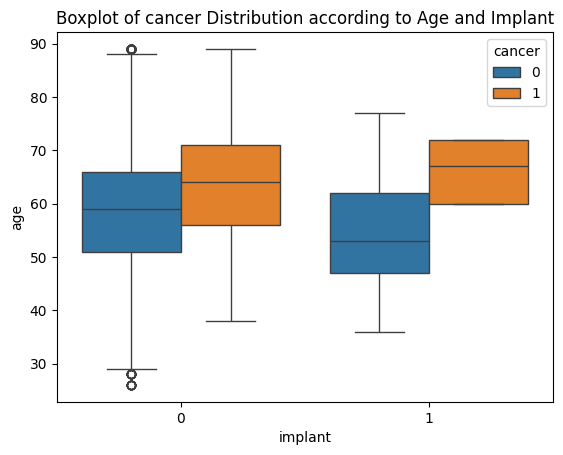

In [ ]:
sns.boxplot(x='implant', y='age', hue='cancer', data=df)
plt.title('Boxplot of cancer Distribution according to Age and Implant')
plt.show()


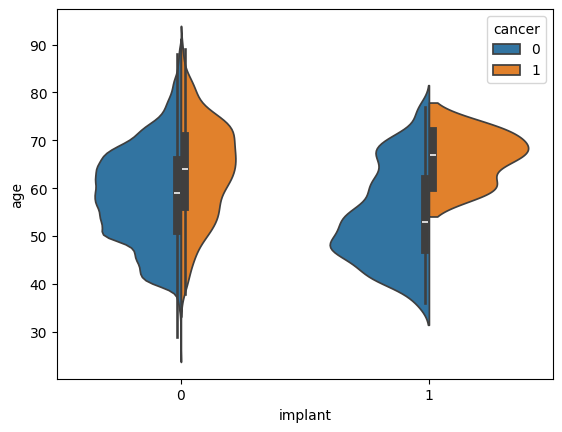

In [ ]:
sns.violinplot(x='implant', y='age', hue='cancer', data=df, split=True)
plt.show()
